# Task FluType

The task is to build a very simple classification model, which allows to predict the virus type from given features `P`.

For building the classifier you have a trainings-data set 
```
./data/flutype_train.csv
```
with which the classifier is trained, and a test data set
```
./data/flutype_test.csv
```
with which the performance of the classifier is tested, subsequently.

Trainings and test data sets have the identical format
consisting of a column `virus` which is the outcome (classification prediction, dependent variable) and `P1, ... P13` which are the independent variables (features) with which the classification model is fitted.

To start the task you should clone the repository from git
```
git clone https://github.com/matthiaskoenig/flutype-task
```
and get the jupyter notebook running
```
cd flutype-task
jupyter notebook
```
This document is the `task.ipynb`, the data is in the subfolder `data`.

In [22]:
# loading test dataset
import pandas as pd
dtest = pd.read_csv('./data/flutype_test.csv', sep="\t")
dtest.head()

,virus,P1,P3,P4,P5,P6,P7,P8,P10,P13
0,X31,1569,2185,3988,3104,161,394,788,4396,443
1,X31,1840,2203,5003,2975,148,613,726,4284,486
2,X31,2039,2269,5163,3067,126,689,692,3493,372
3,X31,1168,1578,4211,1948,172,568,258,3472,314
4,H1,510,892,2609,2874,484,849,1650,2791,1445


The trainings data has the same format.

Your task is to build a simple classification model in python using either scikit-learn (http://scikit-learn.org/stable/) or tensorflow (https://www.tensorflow.org/) using the trainings-data set and test the performance of the classifier on the test-data set.

The problem is a so called supervised learning problem (http://scikit-learn.org/stable/supervised_learning.html) with multi-class classification (i.e. the classification outcome can be one of the multiple virus classes). 

You can use whatever classification algorithm/method you want.
Simplest solution is probably a logistic regression, alternatives could be support vector machines, neuronal network, decision tree, ...

The main outcome of the task is the fitted classifier and the evaluation of the performance of the classifier on trainings & test data set. You should provide a table and graph(s) on the performance (i.e. correct/incorrect classifictions, ...).

## Additional info
* manage your solution in a github repository
* document the solution in a jupyter notebook
* write down what you learned/surprised you

In [44]:
# read the trainings data
dtrain = pd.read_csv('./data/flutype_train.csv', sep="\t")
dtrain

,virus,P1,P3,P4,P5,P6,P7,P8,P10,P13
0,X31,1779.0,2285.0,4711.0,2976.0,145.0,792.0,694.0,3709.0,384.0
1,X31,1286.0,1678.0,4854.0,3133.0,141.0,402.0,738.0,4583.0,343.0
2,X31,2147.0,1688.0,4821.0,2520.0,153.0,426.0,543.0,3737.0,422.0
3,X31,1526.0,2012.0,4708.0,2707.0,141.0,569.0,1396.0,3697.0,324.0
4,X31,1409.0,1894.0,4811.0,3449.0,170.0,556.0,328.0,3357.0,386.0
5,X31,1930.0,2001.0,5294.0,2381.0,138.0,437.0,565.0,3870.0,370.0
6,X31,1920.0,2140.0,4192.0,1899.0,142.0,474.0,936.0,4254.0,468.0
7,X31,1433.0,2030.0,4337.0,2581.0,152.0,617.0,710.0,4894.0,499.0
8,X31,1628.0,2202.0,5215.0,2348.0,187.0,505.0,617.0,4476.0,475.0
9,X31,1047.0,2514.0,3970.0,2894.0,165.0,479.0,327.0,4005.0,428.0


In [75]:
# build classifier with trainings dataset
#LOGISTIC REGRESSION-learning process 

#save table as array
data_train=dtrain.values
# Modelling with Logistic Regression:
from sklearn import preprocessing
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
#feature selection (was determinated in flutype_train.csv)
X = data_train[:,1:8]
y = data_train[:,0]

# normalize the data attributes
# normalized_X = preprocessing.normalize(X)
# or standartize the data attributes
# standartized_X = preprocessing.standartize(X)
# for our task both data files was already generated in normalised form in trainings_data.ipynb

model = LogisticRegression()
model.fit(X, y)

# make predictions
expected = y
predicted = model.predict(X)
# summarize the fit of the model
print("Classification report for classifier %s:\n%s\n"
      % (model, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

print(metrics.accuracy_score(expected,predicted))



Classification report for classifier LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False):
             precision    recall  f1-score   support

         H1       1.00      1.00      1.00        50
         H5       0.98      1.00      0.99        50
         H7       0.98      0.96      0.97        50
         NY       1.00      1.00      1.00        50
         Vi       1.00      1.00      1.00        50
        X31       0.98      0.98      0.98        50

avg / total       0.99      0.99      0.99       300


Confusion matrix:
[[50  0  0  0  0  0]
 [ 0 50  0  0  0  0]
 [ 0  1 48  0  0  1]
 [ 0  0  0 50  0  0]
 [ 0  0  0  0 50  0]
 [ 0  0  1  0  0 49]]
0.99


In [29]:
# run classifier on test dataset
#LOGISTIC REGRESSION-Testing process

data_test=dtest.values
X_t = data_test[:,1:8]
y_t = data_test[:,0]
model = LogisticRegression()
model.fit(X_t, y_t)

# make predictions
expected = y_t
predicted = model.predict(X_t)
# summarize the fit of the model

print("Classification report for classifier %s:\n%s\n"
      % (model, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

print(metrics.accuracy_score(expected,predicted))


Classification report for classifier LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False):
             precision    recall  f1-score   support

         H1       1.00      1.00      1.00         4
         H5       1.00      1.00      1.00         4
         H7       1.00      1.00      1.00         4
         NY       1.00      1.00      1.00         4
         Vi       1.00      1.00      1.00         4
        X31       1.00      1.00      1.00         4

avg / total       1.00      1.00      1.00        24


Confusion matrix:
[[4 0 0 0 0 0]
 [0 4 0 0 0 0]
 [0 0 4 0 0 0]
 [0 0 0 4 0 0]
 [0 0 0 0 4 0]
 [0 0 0 0 0 4]]
1.0


In [41]:
# build classifier with training dataset
#Support Vector Machines-learning process 
from sklearn.svm import SVC

X = data_train[:,1:8]
y = data_train[:,0]
model = SVC()
model.fit(X, y)

# make predictions
expected = y
predicted = model.predict(X)
# summarize the fit of the model
print("Classification report for classifier %s:\n%s\n"
      % (model, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

print(metrics.accuracy_score(expected,predicted))


Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

         H1       1.00      1.00      1.00        50
         H5       1.00      1.00      1.00        50
         H7       1.00      1.00      1.00        50
         NY       1.00      1.00      1.00        50
         Vi       1.00      1.00      1.00        50
        X31       1.00      1.00      1.00        50

avg / total       1.00      1.00      1.00       300


Confusion matrix:
[[50  0  0  0  0  0]
 [ 0 50  0  0  0  0]
 [ 0  0 50  0  0  0]
 [ 0  0  0 50  0  0]
 [ 0  0  0  0 50  0]
 [ 0  0  0  0  0 50]]
1.0


In [42]:
# build classifier with testing dataset
#Support Vector Machines-Testing process 
X_t = data_test[:,1:8]
y_t = data_test[:,0]
model = SVC()
model.fit(X_t, y_t)

# make predictions
expected = y_t
predicted = model.predict(X_t)
# summarize the fit of the model
print("Classification report for classifier %s:\n%s\n"
      % (model, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

print(metrics.accuracy_score(expected,predicted))


Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

         H1       1.00      1.00      1.00         4
         H5       1.00      1.00      1.00         4
         H7       1.00      1.00      1.00         4
         NY       1.00      1.00      1.00         4
         Vi       1.00      1.00      1.00         4
        X31       1.00      1.00      1.00         4

avg / total       1.00      1.00      1.00        24


Confusion matrix:
[[4 0 0 0 0 0]
 [0 4 0 0 0 0]
 [0 0 4 0 0 0]
 [0 0 0 4 0 0]
 [0 0 0 0 4 0]
 [0 0 0 0 0 4]]
1.0


In [45]:
# build classifier with training dataset
#DecisionTreeClassifier-learning process 

from sklearn.tree import DecisionTreeClassifier

X = data_train[:,1:8]
y = data_train[:,0]

model = DecisionTreeClassifier()
model.fit(X, y)

# make predictions
expected = y
predicted = model.predict(X)
# summarize the fit of the model
print("Classification report for classifier %s:\n%s\n"
      % (model, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

print(metrics.accuracy_score(expected,predicted))



Classification report for classifier DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'):
             precision    recall  f1-score   support

         H1       1.00      1.00      1.00        50
         H5       1.00      1.00      1.00        50
         H7       1.00      1.00      1.00        50
         NY       1.00      1.00      1.00        50
         Vi       1.00      1.00      1.00        50
        X31       1.00      1.00      1.00        50

avg / total       1.00      1.00      1.00       300


Confusion matrix:
[[50  0  0  0  0  0]
 [ 0 50  0  0  0  0]
 [ 0  0 50  0  0  0]
 [ 0  0  0 50  0  0]
 [ 0  0  0  0 50  0]
 [ 0  0  0  0  0 50]]
1.0


In [46]:
# build classifier with testing dataset
#DecisionTreeClassifier-learning process -Testing process 
X_t = data_test[:,1:8]
y_t = data_test[:,0]
model = DecisionTreeClassifier()
model.fit(X_t, y_t)

# make predictions
expected = y_t
predicted = model.predict(X_t)
# summarize the fit of the model
print("Classification report for classifier %s:\n%s\n"
      % (model, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

print(metrics.accuracy_score(expected,predicted))

Classification report for classifier DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'):
             precision    recall  f1-score   support

         H1       1.00      1.00      1.00         4
         H5       1.00      1.00      1.00         4
         H7       1.00      1.00      1.00         4
         NY       1.00      1.00      1.00         4
         Vi       1.00      1.00      1.00         4
        X31       1.00      1.00      1.00         4

avg / total       1.00      1.00      1.00        24


Confusion matrix:
[[4 0 0 0 0 0]
 [0 4 0 0 0 0]
 [0 0 4 0 0 0]
 [0 0 0 4 0 0]
 [0 0 0 0 4 0]
 [0 0 0 0 0 4]]
1.0


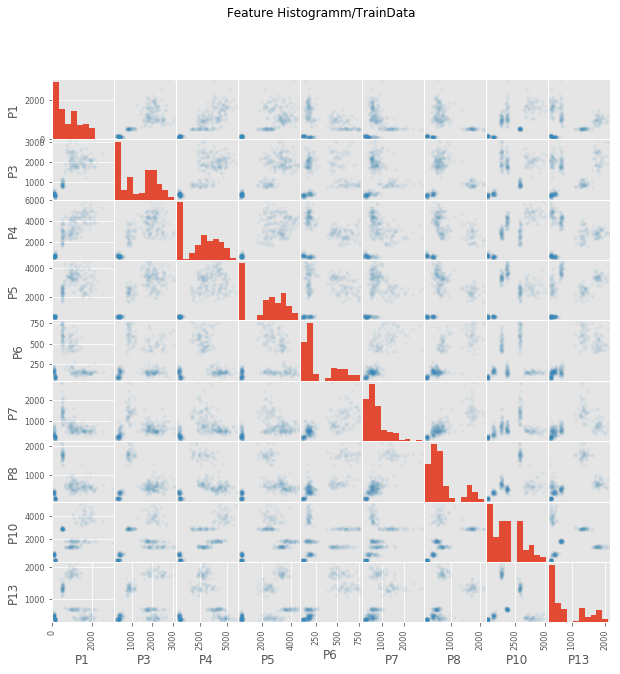

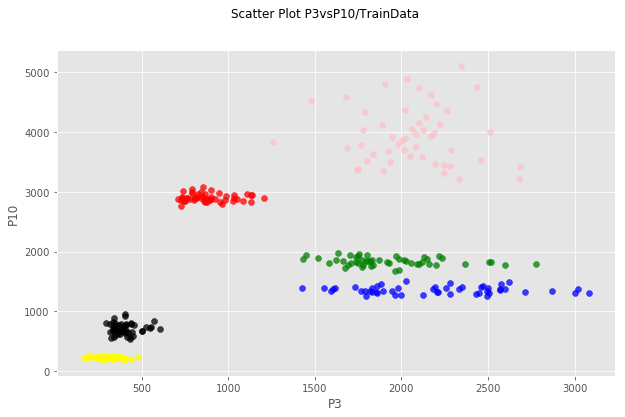

In [73]:
#Feature Histogramm for trainings Data

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
from pandas.tools.plotting import scatter_matrix
scatter_matrix(dtrain, alpha=0.05, figsize=(10, 10));
plt.suptitle('Feature Histogramm/TrainData')

#Scatter Plot features P3 and P10 for trainings Data:
col1 = 'P3'
col2 = 'P10'

plt.figure(figsize=(10, 6))

plt.scatter(dtrain[col1][dtrain['virus'] == 'H1'],
            dtrain[col2][dtrain['virus'] == 'H1'],
            alpha=0.75,
            color='red',
            label='+')

plt.scatter(dtrain[col1][dtrain['virus'] == 'H5'],
            dtrain[col2][dtrain['virus'] == 'H5'],
            alpha=0.75,
            color='blue',
            label='-')
plt.scatter(dtrain[col1][dtrain['virus'] == 'H7'],
            dtrain[col2][dtrain['virus'] == 'H7'],
            alpha=0.75,
            color='green',
            label='+')
plt.scatter(dtrain[col1][dtrain['virus'] == 'NY'],
            dtrain[col2][dtrain['virus'] == 'NY'],
            alpha=0.75,
            color='yellow',
            label='+')
plt.scatter(dtrain[col1][dtrain['virus'] == 'Vi'],
            dtrain[col2][dtrain['virus'] == 'Vi'],
            alpha=0.75,
            color='black',
            label='+')
plt.scatter(dtrain[col1][dtrain['virus'] == 'X31'],
            dtrain[col2][dtrain['virus'] == 'X31'],
            alpha=0.75,
            color='pink',
            label='+')
plt.suptitle('Scatter Plot P3vsP10/TrainData ')

plt.xlabel(col1)
plt.ylabel(col2)


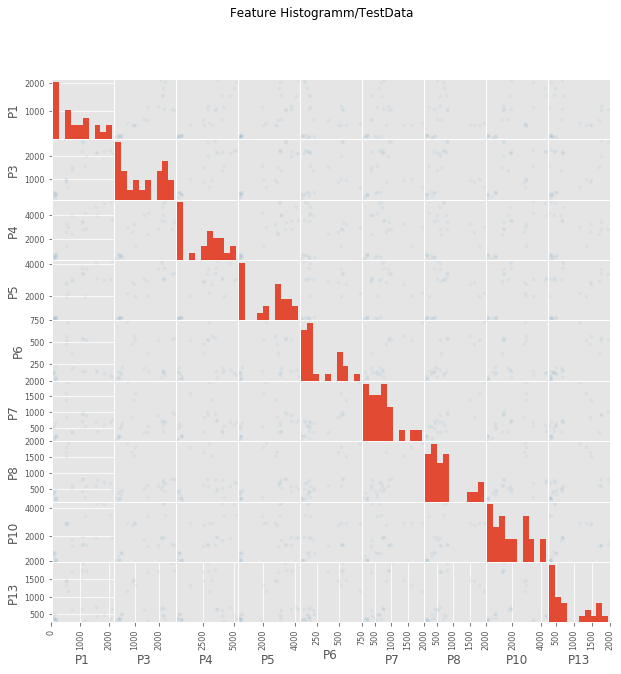

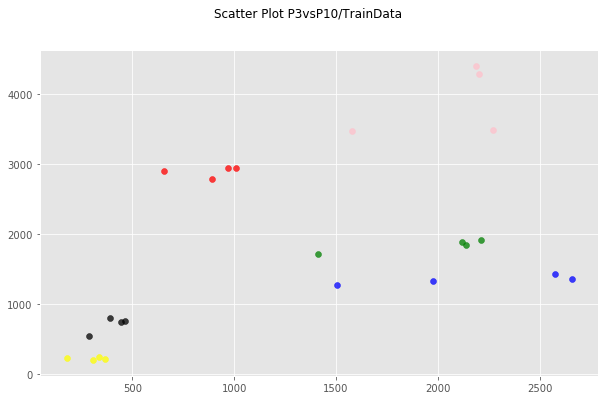

In [74]:
scatter_matrix(dtest, alpha=0.05, figsize=(10, 10));
plt.suptitle('Feature Histogramm/TestData')
#Scatter Plot features P3 and P10 for trainings Data:
col1 = 'P3'
col2 = 'P10'

plt.figure(figsize=(10, 6))

plt.scatter(dtest[col1][dtest['virus'] == 'H1'],
            dtest[col2][dtest['virus'] == 'H1'],
            alpha=0.75,
            color='red',
            label='+')

plt.scatter(dtest[col1][dtest['virus'] == 'H5'],
            dtest[col2][dtest['virus'] == 'H5'],
            alpha=0.75,
            color='blue',
            label='-')
plt.scatter(dtest[col1][dtest['virus'] == 'H7'],
            dtest[col2][dtest['virus'] == 'H7'],
            alpha=0.75,
            color='green',
            label='+')
plt.scatter(dtest[col1][dtest['virus'] == 'NY'],
            dtest[col2][dtest['virus'] == 'NY'],
            alpha=0.75,
            color='yellow',
            label='+')
plt.scatter(dtest[col1][dtest['virus'] == 'Vi'],
            dtest[col2][dtest['virus'] == 'Vi'],
            alpha=0.75,
            color='black',
            label='+')
plt.scatter(dtest[col1][dtest['virus'] == 'X31'],
            dtest[col2][dtest['virus'] == 'X31'],
            alpha=0.75,
            color='pink',
            label='+')
plt.suptitle('Scatter Plot P3vsP10/TrainData ')
